# Vibrational spectroscopy

Vibrational spectroscopy techniques are widely used in chemistry for the identification of compounds or functional groups in the three states of matter: solid, liquid and gaseous state. In this chapter, we are going to revisit and ilustrate some basic concepts to uderstand the physical phenomena behind the main techniques, which are infrared spectroscopy and Raman spectroscopy. 



## Rayleigh scattering

`````{admonition} History
:class: tip
In 1871 Lord Rayleigh explains the colour and polarisation of the skylight.
Rayleigh scattering is an elastic scattering of electromagnetic radiation by particles. The oscillating electric field of light excites the charges of a molecule, causing them to vibrate at the same frequency. The molecule becomes a small radiating dipole scattering the incoming light.

`````


![SegmentLocal](Gif_molecules.gif "Rayleigh Scattering")



## Raman Effect

`````{admonition} History
:class: tip

Sir C. V. Raman and K. S. Krishnan observed the effect in organic liquids using sunlight in 1928, Raman obtained the Nobel prize in physics in 1930

`````

```{figure} CV_Raman.png
---
width: 60%
figclass: margin
name: CV_Raman
---
C.V. Raman with his spectrometer
```


Raman scattering or the Raman effect is the inelastic scattering of photons by matter, meaning that there is both an exchange of energy and a change in the light's direction. Typically this effect involves vibrational energy being gained by a molecule as incident photons from a visible laser are shifted to lower energy. This is called normal **Stokes Raman scattering**. If the incident photons are shifted to higher energy the process is called **Anti-Stokes Raman scattering**

![SegmentLocal](Energy-diagrams-of-Stokes-Rayleigh-and-anti-Stokes-Raman-scattering-Photons-from-the.png "Rayleigh Scattering")


Here we can see how the incident beam produces diferent frequencies depending on the type of scattering:

![SegmentLocal](Raman-rayleigjt.gif "Rayleigh Scattering")


## Spectrum of light

Spectroscopy techniques are available over a very wide energy range:

  - Gamma rays: Mössbauer spectroscopy
  - X-rays: X-ray photoelectron spectroscopy
  - UV-Vis: Raman spectroscopy
  - IR: IR spectroscopy
  - Microwave: Electron paramagnetic resonance spectroscopy
  - Radiowave: Nuclear magnetic resonance

![SegmentLocal](spectrum_light.png "Light spectrum")


## Infrared Spectroscopy

Infrared spectroscopy (IR spectroscopy) is the measurement of the interaction of infrared radiation with matter by absorption, emission, or reflection. It is used to study and identify chemical substances or functional groups. The identifications proceeds via obtaining the infrared spectrum. An IR spectrum can be visualized in a graph of infrared light absorbance (or transmittance) on the vertical axis vs the wavenumber. The wave number is a unit directric proportional to the energy. 

Here we show the IR spectrum of the water, in a plot of trasmitance vs wavenumber: 

![SegmentLocal](Water_spectrum.png "Water spectrum")


## Clasical approach

We can start a first approach from a clasical point of view. Imagine that we have two atoms joined by a spring, we can actually used Hook Law to derive the force that each atom experiences:

$$
F= m \frac{\partial^2 R(t) }{\partial t^2 }= \nabla_R V(R)
$$

The armonic potential $V(R)$ can be expanded in Taylor series around the equilibrium position $R_0$:

$$
V(R) = V_0 + \frac{\partial V }{\partial R }|_{R=R_0}(R-R_0)+\frac{1}{2}\frac{\partial^2 V }{\partial R^2 }|_{R=R_0}(R-R_0)^2+...
$$

Being the thrid term the spring constant $k$

In [1]:
import matplotlib.pyplot as plt
import imageio
from pylab import *

ModuleNotFoundError: No module named 'imageio'

# Interactive program for isotopic and multiple bond molecules

In [94]:
from pylab import *
from ipywidgets import *
plt.rcParams.update({'font.size': 18})

%matplotlib inline

In [95]:
@interact( k=(1,100,5), m1=(1,10,1), m2=(1,10,1))

def Vibration( k=5, m1=10, m2=10):
    
    x_0 = 0
    m   = m1*m2/(m1+m2)
    t = linspace(0,10,501)
    
    v_0=array([[0, 0],  [0, 0]]) # velocities between -1 y 1
    p_0=array([[0,0],  [1, 0]]) # positions
    
    fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(18,5), 
                       gridspec_kw = {'wspace':0.4, 'hspace':0})
    
    x   = x_0+sin(sqrt(k/m)*t)+cos(sqrt(k/m)*t)
    ax[0].set_ylim(-3,3)
    ax[1].set_ylim(-3,3)
    ax[1].set_xlim(-1,2)
    ax[2].set_ylim(0,2)
    ax[0].plot(t,x)
    
    x1_m=p_0[:,0][0]
    y1_m=p_0[:,1][0] 
    ax[1].scatter(x1_m,y1_m,s=m1*50, c="blue",edgecolor="None")
    
    x2_m=p_0[:,0][1]
    y2_m=p_0[:,1][1] 
    ax[1].scatter(x2_m,y2_m,s=m2*50,c="orange",edgecolor="None")
    
    
    w_0= sqrt(k/m)
    γ=1
    F_0= 10
    
    w_f=linspace(-5,20,501)
    A=(F_0/m)/(sqrt((-w_f**2+w_0**2)**2+4*w_f**2*γ**2))
    
    ax[2].axvline(w_0)
    ax[2].plot(w_f,A)
    

interactive(children=(IntSlider(value=5, description='k', min=1, step=5), IntSlider(value=10, description='m1'…

# Simulation using analytical solution

In [102]:
import matplotlib.pyplot as plt
import imageio
from pylab import *
from matplotlib.animation import FuncAnimation
plt.rcParams.update({'font.size': 12})
from matplotlib.animation import FuncAnimation
from IPython.display      import HTML
# conda install -c conda-forge ffmpeg

In [103]:
s=1
def vibra(part,p_0,k, m1, m2):
    FV=zeros((part,2))
    bond=2.*s
    m=m1*m2/(m1+m2)
    for at in range(0,part,2):
        d= p_0[at]-p_0[at+1] #vector distancia enlace entre un particula y su consecutiva
        r= sqrt(d[0]**2+d[1]**2) # norma del vector 
        u=d/r
        FV[at]=-k*(r-bond)*u
        FV[at+1]=-k*(-r+bond)*u
        acelv=FV/m        
    return  acelv
def graf(pn_0,vc_0,pn_k,vc_k,pn_m,vc_m):
    alpha_1=0.25
    p_0=array([[0,2],  [1, 2]]) # positions
    p_k=array([[0,0],  [1, 0]]) # positions
    p_m=array([[0,4],  [1, 4]]) # positions
    
    ax[0].clear()            #borra la graficar y pone otra encima
    ax[0].set_xlim(-3,4)  #ax tiene ese atributo porque se definió abajo
    ax[0].set_ylim(-3,box)  
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")  
    
    #Change in m
    m1,m2= 10,20
    x1_m=pn_m[:,0][0]
    y1_m=pn_m[:,1][0] 
    ax[0].scatter(x1_m,y1_m,s=m1*50, c="blue",edgecolor="None")
    
    x2_m=pn_m[:,0][1]
    y2_m=pn_m[:,1][1] 
    ax[0].scatter(x2_m,y2_m,s=m2*50,c="orange",edgecolor="None")
    ax[0].hlines(y2_m, xmin=x1_m, xmax=x2_m, linewidth=2, color='green', label="Variation in m")
    
    ax[0].scatter(p_m[:,0][0],p_m[:,1][0],s=m1*50, c="blue",edgecolor="None", alpha=alpha_1)
    ax[0].scatter(p_m[:,0][1],p_m[:,1][1],s=m2*50, c="blue",edgecolor="None", alpha=alpha_1)
    
    
    ### Reference
    m1,m2= 10,10
    x1_0=pn_0[:,0][0]
    y1_0=pn_0[:,1][0] 
    ax[0].scatter(x1_0,y1_0,s=m1*50, c="blue",edgecolor="None")
    
    
    x2_0=pn_0[:,0][1]
    y2_0=pn_0[:,1][1] 
    ax[0].scatter(x2_0,y2_0,s=m2*50,c="orange",edgecolor="None")
    ax[0].hlines(y2_0, xmin=x1_0, xmax=x2_0, linewidth=2, color='black', label="Reference")
    
    ax[0].scatter(p_0[:,0][0],p_0[:,1][0],s=m1*50, c="blue",edgecolor="None", alpha=alpha_1)
    ax[0].scatter(p_0[:,0][1],p_0[:,1][1],s=m1*50, c="blue",edgecolor="None", alpha=alpha_1)
    
    #Change in k
    x1_k=pn_k[:,0][0]
    y1_k=pn_k[:,1][0] 
    ax[0].scatter(x1_k,y1_k,s=m1*50, c="blue",edgecolor="None")
    
    x2_k=pn_k[:,0][1]
    y2_k=pn_k[:,1][1] 
    ax[0].scatter(x2_k,y2_k,s=m2*50,c="orange",edgecolor="None")
    ax[0].hlines(y2_k, xmin=x1_k, xmax=x2_k, linewidth=2, color='r', label="Variation in k")
    
    ax[0].scatter(p_k[:,0][0],p_k[:,1][0],s=m1*50, c="blue",edgecolor="None", alpha=alpha_1)
    ax[0].scatter(p_k[:,0][1],p_k[:,1][1],s=m1*50, c="blue",edgecolor="None", alpha=alpha_1)
    
    
    ax[0].legend(loc='lower center')
    
    ax[1].clear() 
    ax[1].set_xlim(0,10)  #ax tiene ese atributo porque se definió abajo
    ax[1].set_ylim(-1,0)  
    ax[1].set_xlabel("time")
    ax[1].set_ylabel("x") 
    
    ax[1].plot(t,position_0, label="Reference",c="black")
    ax[1].plot(t,position_m, label="m",c="green")
    ax[1].plot(t,position_k, label="k",c="red")
    ax[1].legend()
    
    fig.canvas.draw() #muestra la figura
    plt.show()

<IPython.core.display.Javascript object>


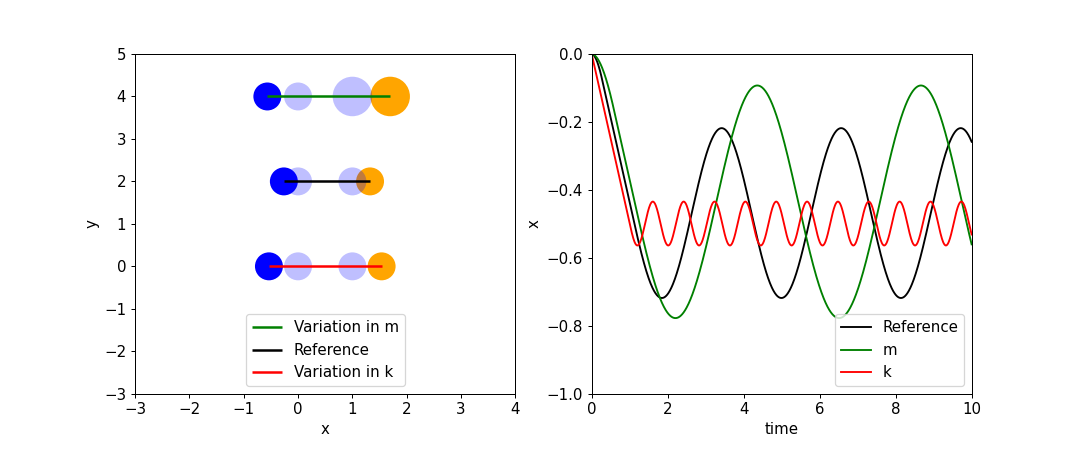

In [104]:
#Definir parametros
%matplotlib notebook
box  = 5.0 
part = 2

# Initial conditions

v_0=array([[0, 0],  [1, 0]]) # velocities between -1 y 1
v_k=array([[0, 0],  [1, 0]]) # velocities between -1 y 1
v_m=array([[0, 0],  [1, 0]]) # velocities between -1 y 1

p_0=array([[0,2],  [1, 2]]) # positions

p_k=array([[0,0],  [1, 0]]) # positions

p_m=array([[0,4],  [1, 4]]) # positions



    
# #Building the figure
fig, ax = plt.subplots(1, 2,figsize=(12, 5))
# fig=plt.figure()
# ax=fig.add_subplot(111)  
# fig.canvas.draw()        #update the figure
    
    
dt=0.01
tiempo=0

#Start simulation

cont=0
position_0=[]
position_m=[]
position_k=[]
t=[]
graphs= []
while tiempo < 10:
    aV_0 = vibra(part,p_0,10,10,10)
    aV_k = vibra(part,p_k,150,10,10)
    aV_m = vibra(part,p_m,10,150,10)
    
    vn_0 = v_0+aV_0*dt
    vn_k = v_k+aV_k*dt
    vn_m = v_m+aV_m*dt
    
    #adjust velocities
    vn_0[(vn_0>0.5)] =0.5
    vn_0[(vn_0<-0.5)]=-0.5
    
    vn_k[(vn_k>0.5)] =0.5
    vn_k[(vn_k<-0.5)]=-0.5
    
    vn_m[(vn_m>0.5)] =0.5
    vn_m[(vn_m<-0.5)]=-0.5
    
    pn_0=p_0+vn_0*dt
    pn_k=p_k+vn_k*dt
    pn_m=p_m+vn_m*dt
    
    vc_0=sqrt(vn_0[:,0]**2+vn_0[:,1]**2)
    vc_k=sqrt(vn_k[:,0]**2+vn_k[:,1]**2)
    vc_m=sqrt(vn_m[:,0]**2+vn_m[:,1]**2)
    
    cont+=1
    
    
    if cont%10==0:
        graf(pn_0,vc_0,pn_k,vc_k,pn_m,vc_m)
        plt.savefig('image{0}.png'.format(cont))
        image=imageio.imread('image{0}.png'.format(cont))
        graphs.append(image)
    tiempo=tiempo+dt
    p_0=pn_0
    v_0=vn_0
    
    p_k=pn_k
    v_k=vn_k
    
    p_m=pn_m
    v_m=vn_m
    position_0.append(pn_0[:,0][0])
    position_m.append(pn_m[:,0][0])
    position_k.append(pn_k[:,0][0])
    t.append(tiempo)
imageio.mimsave('./example.gif', # output gif
                graphs,          # array of input frames
                fps = 15)      


![SegmentLocal](./example.gif "Variations isotope and multibonding")

# Solid - Monoatomic chain


\begin{align}
x_n = x_n^{\rm eq} + A e^{i\omega t-ikna}
\end{align}

where $x_n^{\rm eq}=na$.


\begin{align}
\delta x_n = A e^{i\omega t-ikna}
\end{align}

\begin{align}
\omega(k) = \sqrt{\frac{4\kappa}{m}} \bigg| \sin\bigg( \frac{ka}{2} \bigg) \bigg|
\end{align}

In [79]:
t   = 0; κ = 1; m = 1; a = 1; A = 0.2
n   = arange(-3,3)
xeq = n*a
yeq = zeros(len(xeq))
#######
k   = pi/a
#######
ω   = sqrt(4*κ/m) 
δx  = A*exp(1J*ω*t-1J*k*n*a)
#x_0+sin(sqrt(k/m)*i)+cos(sqrt(k/m)*i)
y   = zeros(len(xeq)) # + δx
x   = xeq + δx

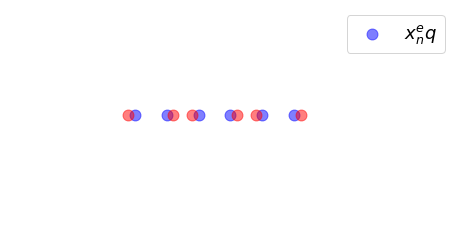

In [80]:
fig   = plt.figure(figsize=(8,4))
ax    = plt.axes(xlim=(-7, 7), ylim=(-0.25, 0.25))
ax.scatter(xeq,yeq,s=120,alpha=0.5,label="$x_n^eq$",color="b")
dots  = ax.scatter( x.real, y.real,s=120,alpha=0.5,color="r" )
ax.legend(loc=0,fontsize=18)

def animate(i):
    Δt = 1e-2
    t  = i*Δt
    δx = A*exp(1J*ω*t-1J*k*n*a)
    y  = zeros(len(xeq)) # + u
    x  = xeq + δx
    dots.set_offsets(np.c_[x.real, y.real])
    ax.set_axis_off()
    
anim = FuncAnimation(fig, animate, interval=5, frames = 1001)

In [81]:
HTML(anim.to_html5_video())

HTML(value='<video width="576" height="288" controls autoplay loop>\n  <source type="video/mp4" src="data:vide…

# Quality Factor

The quality factor describes something important about an oscillating system: something related to the number of cycles it takes for the motion to die down.


The quality factor $Q$ can be calculated as:

$$
Q= \frac{\omega _0}{\gamma}
$$


large Q means "will oscillate for many cycles before stopping "
small Q means "will oscillate for only a few cycles before stopping "



`````{admonition} Note
:class: tip
The quality factor has no units, it is just a number

`````



In [34]:
from pylab import *
from ipywidgets import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})


In [58]:

@interact(  μ=(1,10,1), γ=(1,10,1), w_0=(1,20,2))

def QualityF( μ=5, γ=1, w_0=10):
    F_0=10
   
    w_f= linspace(-5,20,500)
    
    fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,5))
    
    A=(F_0/μ)/(sqrt((w_f**2-w_0**2)**2+4*w_f**2*γ**2))
    
#     ax.set_ylim(-3,3)
    ax.set_xlim(-5,20)
    ax.set_ylim(0,1.1)
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Frequency [ω]")
    ax.plot(w_f,A)
    
#add a reference molecule  - see pptx -> Energy disipation 
# -> curve that doesn't change, or fixed ax

interactive(children=(IntSlider(value=5, description='μ', max=10, min=1), IntSlider(value=1, description='γ', …

# Hydrogen catalysis


`````{admonition} Real life problem
:class: tip 

Adsorption is a surface–based exothermic process that leads to the transfer of a molecule from a fluid bulk to the solid surface of the adsorbent. The substance that is adsorbed to the adsorbent is called adsorbate. The process may also be classified as physical adsorption (physisorption) or chemical sorption (chemisorption), depending on the interactions between the molecules and surface. Physical adsorption is dominated by weak Van der Waals forces and electrostatic interactions, while in chemisorption, strong chemical bonds such as covalent bonds are formed between the surface and the adsorbed species. Chemical adsorption is slow-paced compared to physical adsorption and most frequently a monomolecular layer is formed on the material surface. In contrast, physisorption usually entails the formation of a thick multilayer on the surface

`````


![SegmentLocal](Catalysis_H2.jpg "Catalysis H_2")

`````{admonition} Real life problem
:class: admonition

Based on this problem, we can see that we have new bonds, which means a change in the chemical nature of the system
Can you guess what would happen with the vibrations is H_2 molecule?

`````
